In [7]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import expon
from scipy.integrate import quad


### <center> Bounded Parameters

Let $\theta = g(\phi)$ where theta is a bounded parameter on $S \subset \mathbb{R}^n$ and $g$ is an invertible map 
$g: \mathbb{R}^n \rightarrow S$. For MCMC the component of the likelihood with respect to the model is unchanged, 
i.e. $\mathcal{L}(\mathcal{D}|\theta) = \mathcal{L}(\mathcal{D}|g(\phi)) = \mathcal{L}(\mathcal{D}|\phi)$. However priors written in terms of $\theta$ must be re-derived in terms of $\phi$. 

Given a prior $p_{\theta}(\theta)$ we can write $p_{\phi}(\phi) = p_{\theta}(g(\phi))\frac{dg}{d\phi}$.

#### <center> Example

Suppose $\theta > 0$ and $g(\phi) = e^{\phi}$ and let $p(\theta|\lambda) = \lambda e^{-\lambda \theta}$. Then $p(\phi|\lambda)$ is given by $p_{\theta}(e^{\phi})e^{\phi}$. 



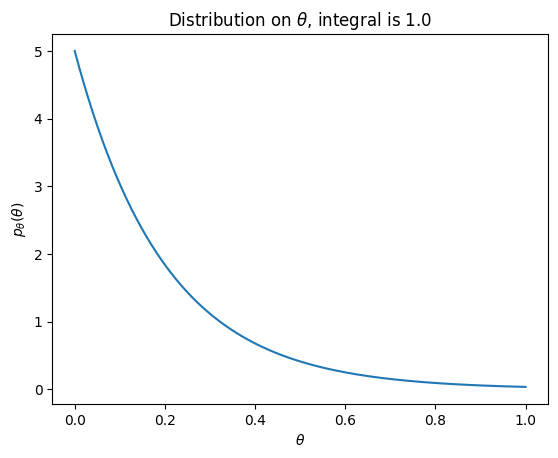

In [8]:
'''Example with the exponential prior'''

rng = np.random.default_rng(0)
beta = 5.

theta_samples = np.linspace(0,1,2**10 + 1)

densities = expon.pdf(theta_samples,scale = 1/beta)
integral = quad(lambda x: expon.pdf(x,scale = 1/beta), a=0,b=20)[0]

plt.title(f"Distribution on $\\theta$, integral is {integral}")
plt.ylabel("$p_{\\theta}(\\theta)$")
plt.xlabel("$\\theta$")
plt.plot(theta_samples,densities)


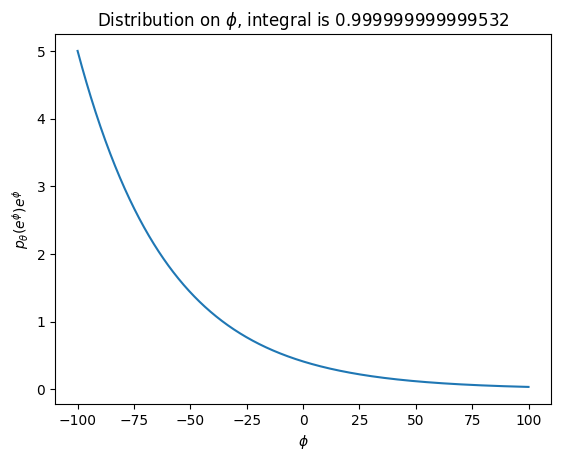

In [9]:
phi_samples = np.linspace(-100,100,2**10 + 1)

densities = expon.pdf(theta_samples,scale = 1/beta)
integral = quad(lambda x: expon.pdf(np.exp(x),scale = 1/beta)*np.exp(x), a=-30,b=30)[0]

plt.title(f"Distribution on $\\phi$, integral is {integral}")
plt.ylabel("$p_{\\theta}(e^{\\phi})e^{\\phi}$")
plt.xlabel("$\\phi$")
plt.plot(phi_samples,densities)


### <center> Higher Dimensions

In higher dimensionalities, the formula is extended as follows. 

Suppose the model is parameterized in terms of $x \in \mathbb{R}^m$ and $y \in \mathbb{R}^n$. We apply a transformation $z = f(x,y)$ such that $z \in \mathbb{R}^m$. It's convenient to examine the transformation on the extended space $\mathbb{R}^{m + n}$ where $g(x,y) = [f(x,y),y]^T$, so $g:\mathbb{R}^{m+n} \rightarrow \mathbb{R}^{m+n}$. The scaling factor is thus given by $\det(J_g)$ where $J_g$ is a block Jacobian such that


$$
J_g = 
\begin{bmatrix}
J_{f,x} &  J_{f,y} \\
0  &  I\\
\end{bmatrix}
$$

#### <center> Example 

Performing inference on an OU process parameterized as follows. 

$$
dx_t = -\lambda(x_t - m)dt + \sqrt{2\lambda}\sigma dW_t 
$$

The rate of decorrelation $\lambda$ and the diffusion parameter $\sigma$ are both positive constants, while the mean $m$ is unbounded. 
The prior on $\lambda$ is given by an exponential distribution with scale parameter $\beta = 5$. The prior on $\sigma$ is a beta distribution with parameters $a = b = 2$. We apply the transformation $\Lambda = e^{\lambda}$ and $\Sigma = e^{\sigma}$ and write $g(x,y) = [e^{\lambda},e^{\sigma},m]^T$. The Jacobian $J_g$ is thus 

$$
J_g = 
\begin{bmatrix}
e^\lambda &  0 & 0 \\
0  &  e^\sigma & 0\\
0  &  0 & 1\\
\end{bmatrix}
$$

Where $\det(J_g) = e^\lambda e^\sigma$.